In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Filter

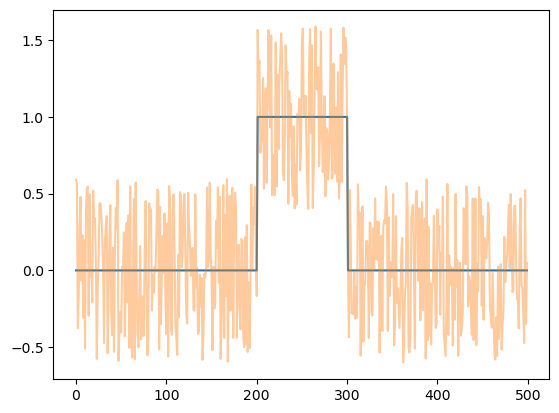

In [2]:
# making a square wave
sqwave = [0]*500
for i in range(100):
    sqwave[201+i] = 1
plt.plot(sqwave)

# adding noise
i = 0
noisysqwave = [0]*500
for i in range(len(sqwave)):
    uninoise = np.random.uniform(low=-0.6, high=0.6)
    noisysqwave[i] = sqwave[i] + uninoise
    
plt.plot(noisysqwave, alpha = 0.4)

### Fourier Transform

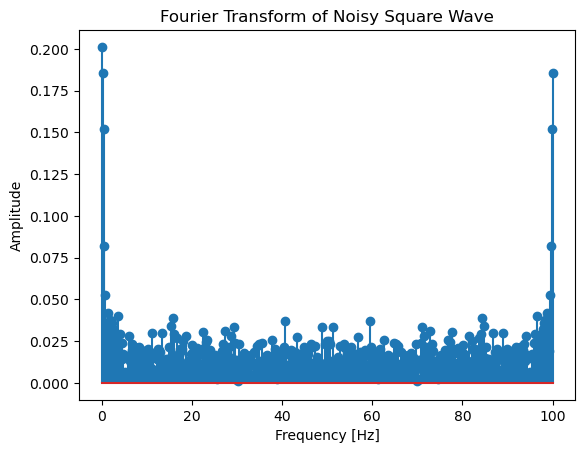

In [3]:
noisysqwavefft = np.fft.fft(noisysqwave)
N = len(noisysqwave)
Fsamp = 100 # 100 samples = 1 second --> 5s sample, 1s pulse
f = np.linspace(0, Fsamp, N)

plt.ylabel("Amplitude")

plt.xlabel("Frequency [Hz]")
plt.stem(f,np.abs(noisysqwavefft)/N)
plt.title('Fourier Transform of Noisy Square Wave')
plt.show()

### Moving Average Filter. Edge effects at end of the wave are compensated by reversing the moving average direction.

In [4]:
sqfilt = [0]*500

for i in range(len(noisysqwave)-11):
    sqfilt[i] = (noisysqwave[i] + noisysqwave[i+1] + noisysqwave[i+2] + noisysqwave[i+3] + noisysqwave[i+4] + noisysqwave[i+5] + noisysqwave[i+6] + noisysqwave[i+7] + noisysqwave[i+8] + noisysqwave[i+9] + noisysqwave[i+10])/11
    
for i in range(1,11):
    sqfilt[-i] = (noisysqwave[-i] + noisysqwave[-i-1] + noisysqwave[-i-2] + noisysqwave[-i-3] + noisysqwave[-i-4] + noisysqwave[-i-5] + noisysqwave[-i-6] + noisysqwave[-i-7] + noisysqwave[-i-8] + noisysqwave[-i-9] + noisysqwave[-i-10])/11

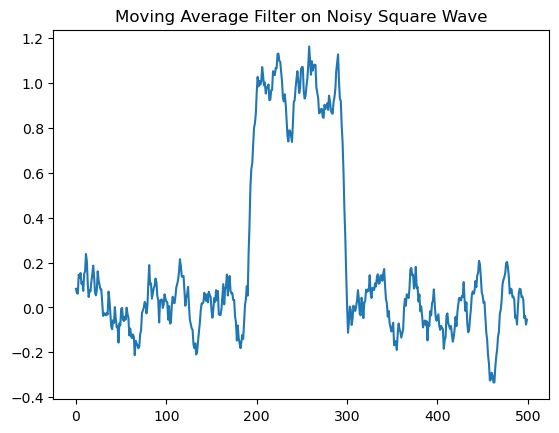

Text(0.5, 1.0, 'Fourier Transform of MA Filtered Noisy Square Wave')

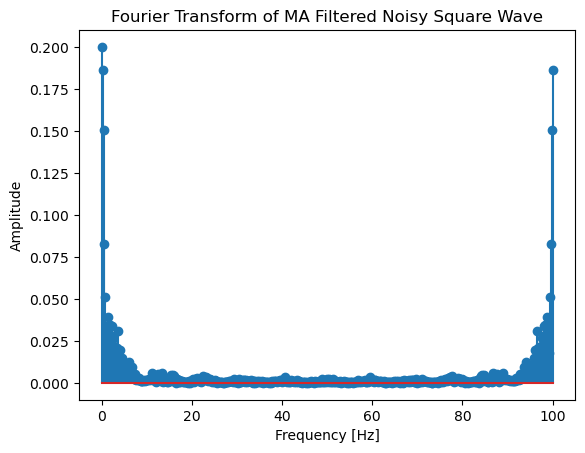

In [5]:
plt.plot(sqfilt)
plt.title('Moving Average Filter on Noisy Square Wave')
plt.show()


sqwaveMAfft = np.fft.fft(sqfilt)
N = len(sqfilt)
Fsamp = 100 # 100 samples = 1 second --> 5s sample, 1s pulse
f = np.linspace(0, Fsamp, N)

plt.ylabel("Amplitude")

plt.xlabel("Frequency [Hz]")
plt.stem(f,np.abs(sqwaveMAfft)/N)
plt.title('Fourier Transform of MA Filtered Noisy Square Wave')


# Plotting Impulse and Step Functions

<StemContainer object of 3 artists>

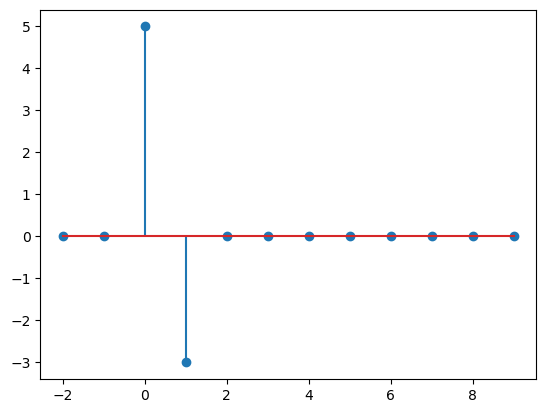

In [6]:
# x[n] = 5*d[n] - 3*d[n-1]

n = np.arange(-2,10,1)
i = 0
x1=[0]*12
unit = [0]*2 + [1]*10
impulse = 1

x1[0+2] = 5*impulse
x1[1+2] = -3*impulse
    
plt.stem(n, x1)

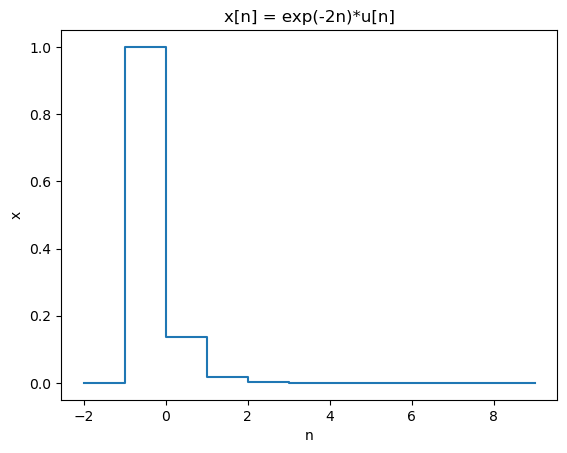

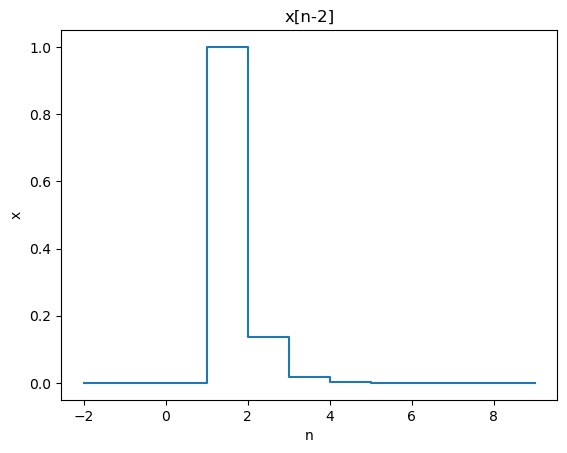

In [7]:
# x[n] = exp(-2n)*u[n]

x2a = [0]*12
i = 0
for i in range(12):
    x2a[i] = np.exp(-2*n[i])*unit[i]

plt.step(n,x2a)
plt.title('x[n] = exp(-2n)*u[n]')
plt.xlabel('n')
plt.ylabel('x')
plt.show()

# x[n-2]
x2b = [0]*14
i = 0
for i in range(12):
    x2b[i+2] = np.exp(-2*n[i])*unit[i]
    
plt.step(n,x2b[0:12])
plt.title('x[n-2]')
plt.xlabel('n')
plt.ylabel('x')
plt.show()

# Moving Average Filter Pt2

### Impulse Response of SMA filter

$$h[n] = \frac{1}{M} \sum_{n=0}^{M-1}{\delta[n]}$$

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<StemContainer object of 3 artists>

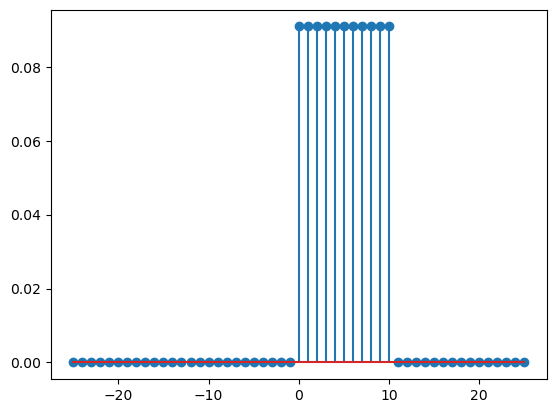

In [8]:
h = [0]*51
impulse = [0]*25+[1]+[0]*25
print(impulse)
x = np.arange(-25, 26)
for n in range(len(h)-11):
    h[n] = (impulse[n] + impulse[n-1] + impulse[n-2] + impulse[n-3] + impulse[n-4] + impulse[n-5] + impulse[n-6] + impulse[n-7] + impulse[n-8] + impulse[n-9] + impulse[n-10])/11
    
for n in range(1,12):
    h[-n] = (impulse[-n] + impulse[-n-1] + impulse[-n-2] + impulse[-n-3] + impulse[-n-4] + impulse[-n-5] + impulse[-n-6] + impulse[-n-7] + impulse[-n-8] + impulse[-n-9] + impulse[-n-10])/11

plt.stem(x, h)

The impulse response of a simple  moving everage filter is a single square wave pulse that has the same width of the filter, and a height of 1/filter width.

### Step Response of SMA filter

$$s[n] = \frac{1}{M} \sum_{n=0}^{M-1}{u[n]}$$

<StemContainer object of 3 artists>

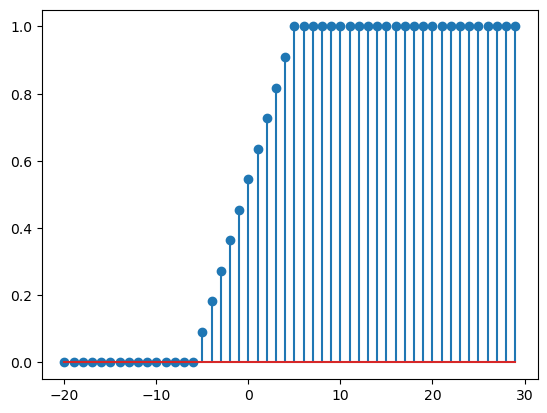

In [14]:
s = [0]*50
stp = [0]*25+[1]*25
x = np.arange(-20, 30)
for n in range(len(h)-11):
    s[n] = (stp[n] + stp[n+1] + stp[n+2] + stp[n+3] + stp[n+4] + stp[n+5] + stp[n+6] + stp[n+7] + stp[n+8] + stp[n+9] + stp[n+10])/11
    
for n in range(1,12):
    s[-n] = (stp[-n] + stp[-n-1] + stp[-n-2] + stp[-n-3] + stp[-n-4] + stp[-n-5] + stp[-n-6] + stp[-n-7] + stp[-n-8] + stp[-n-9] + stp[-n-10])/11

plt.stem(x, s)

The step response of a simple moving average filter has a linear increase/sample from 0 to the step function's non-zero value, of the width of the filter. Each increase has a magnitude of 1/filter width.

### Frequency Response of SMA Filter

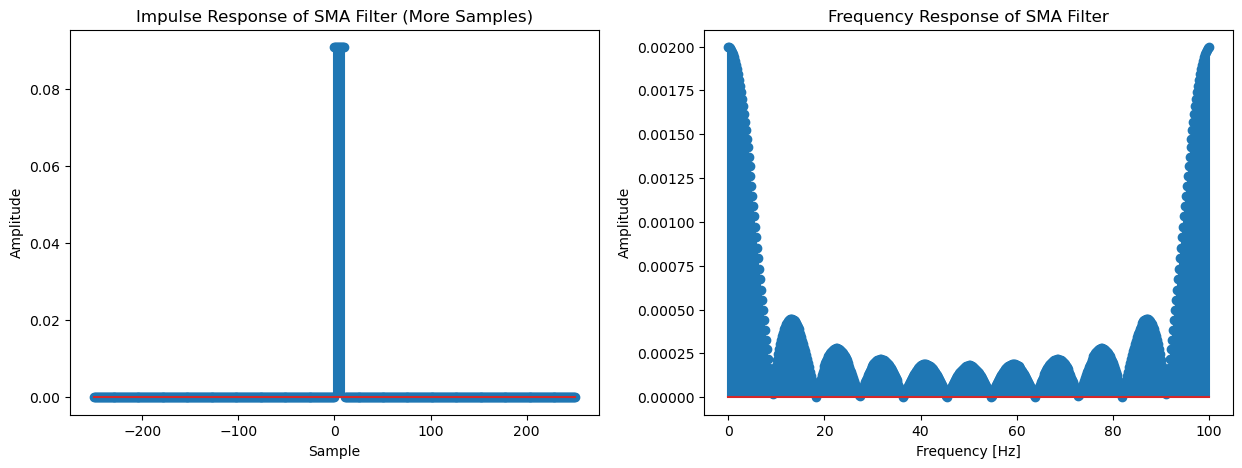

In [16]:
imph = [0]*501
impulse = [0]*250+[1]+[0]*250
impx = np.arange(-250, 251)
for n in range(len(imph)-11):
    imph[n] = (impulse[n] + impulse[n-1] + impulse[n-2] + impulse[n-3] + impulse[n-4] + impulse[n-5] + impulse[n-6] + impulse[n-7] + impulse[n-8] + impulse[n-9] + impulse[n-10])/11
    
for n in range(1,12):
    imph[-n] = (impulse[-n] + impulse[-n-1] + impulse[-n-2] + impulse[-n-3] + impulse[-n-4] + impulse[-n-5] + impulse[-n-6] + impulse[-n-7] + impulse[-n-8] + impulse[-n-9] + impulse[-n-10])/11


plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.title('Impulse Response of SMA Filter (More Samples)')
plt.stem(impx, imph)

FResp = np.fft.fft(imph)
N = len(imph)
Fsamp = 100 # 100 samples = 1 second --> 5s sample, 1s pulse
f = np.linspace(0, Fsamp, N)

plt.subplot(1, 2, 2)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title('Frequency Response of SMA Filter')
plt.stem(f,np.abs(FResp)/N)
plt.show()

# Moving Average Filter Pt3

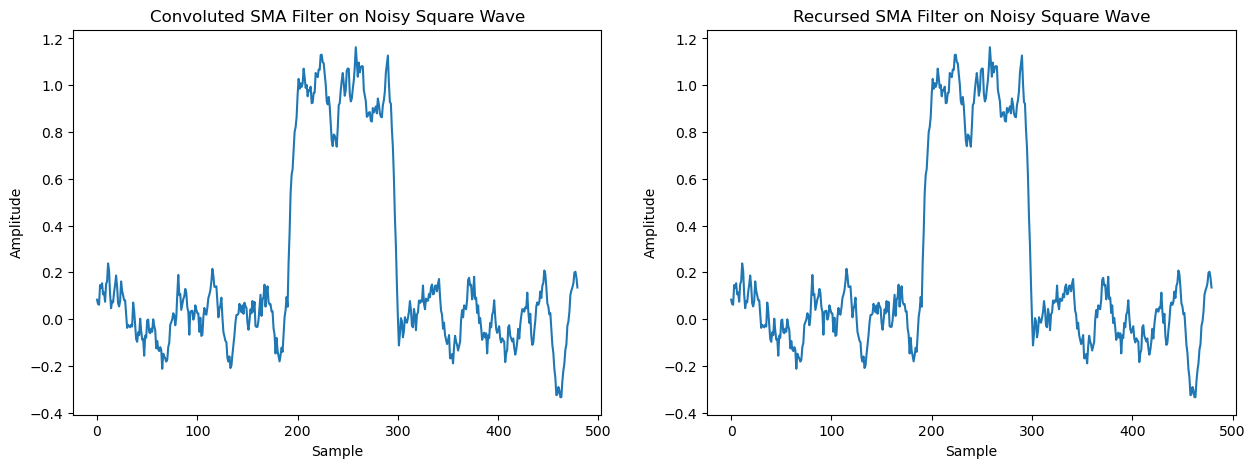

<function matplotlib.pyplot.show(close=None, block=None)>

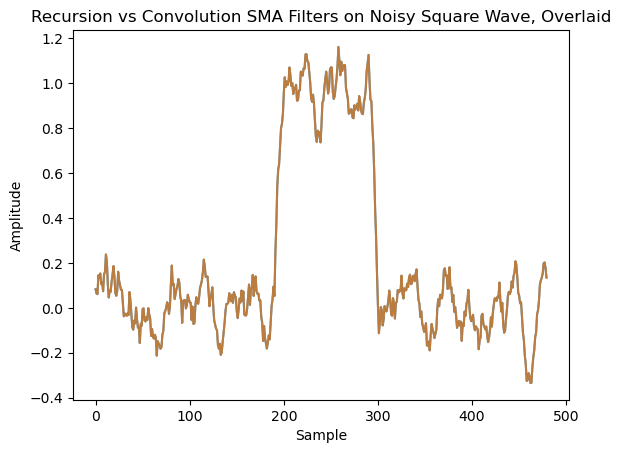

In [11]:
MARec_sqwave = [0]*500
MAwidth = 11



for i in range(len(noisysqwave)-11):
    for i in range(0,1):
        MARec_sqwave[i] = (noisysqwave[i] + noisysqwave[i+1] + noisysqwave[i+2] + noisysqwave[i+3] + noisysqwave[i+4] + noisysqwave[i+5] + noisysqwave[i+6] + noisysqwave[i+7] + noisysqwave[i+8] + noisysqwave[i+9] + noisysqwave[i+10])/MAwidth
    for i in range(1,len(noisysqwave)-11):
        MARec_sqwave[i] = (MARec_sqwave[i-1]*MAwidth + noisysqwave[i+MAwidth-1] - noisysqwave[i-1])/MAwidth
    
for i in range(1,11):
    MARec_sqwave[-i] = (MARec_sqwave[-i+1]*MAwidth + noisysqwave[-i-MAwidth+1] - noisysqwave[-i+1])/MAwidth


plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(sqfilt[:480])
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.title('Convoluted SMA Filter on Noisy Square Wave')

plt.subplot(1, 2, 2)
plt.plot(MARec_sqwave[:480])
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.title('Recursed SMA Filter on Noisy Square Wave')
plt.show()

plt.plot(sqfilt[:480])
plt.plot(MARec_sqwave[:480], alpha = 0.7)
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.title('Recursion vs Convolution SMA Filters on Noisy Square Wave, Overlaid')
plt.show
